### Using the dataset to train a model

In [1]:
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# neural neworks
import tensorflow.keras as kr

In [2]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

<AxesSubplot:xlabel='speed', ylabel='power'>

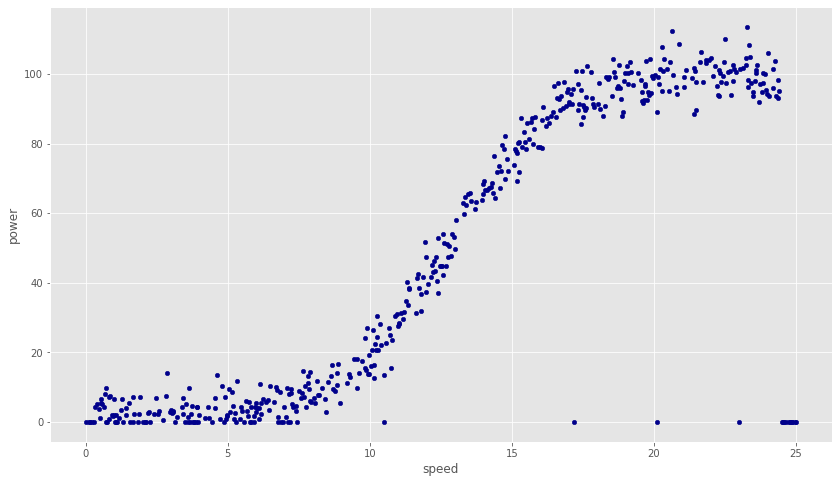

In [3]:
data = pd.read_csv('power_production.csv')
data.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

<AxesSubplot:xlabel='speed', ylabel='power'>

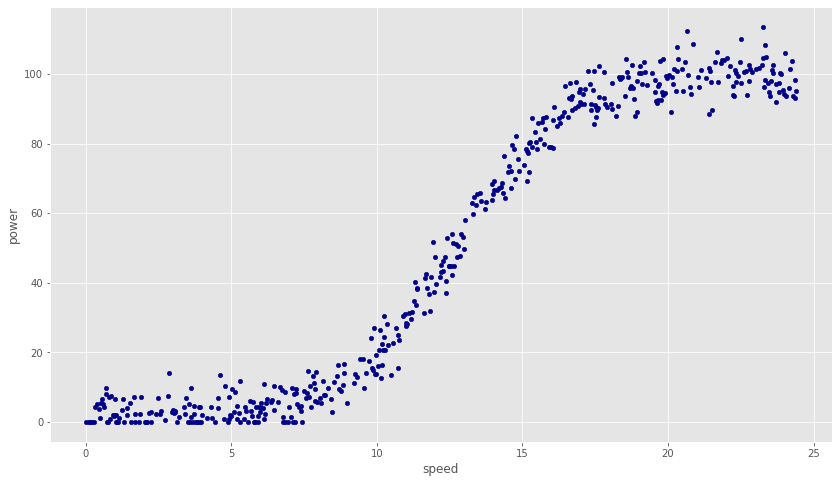

In [4]:
data = pd.read_csv('power_production.csv')
## drop rows where the power putput is zero even though wind speed > 10
df_new = data.drop(data[(data['speed'] > 10.0) & (data['power'] == 0.0)].index)   # https://stackoverflow.com/questions/52456874/drop-rows-on-multiple-conditions-in-pandas-dataframe
df_new.plot.scatter(x='speed',
                      y='power',
                      c='DarkBlue')

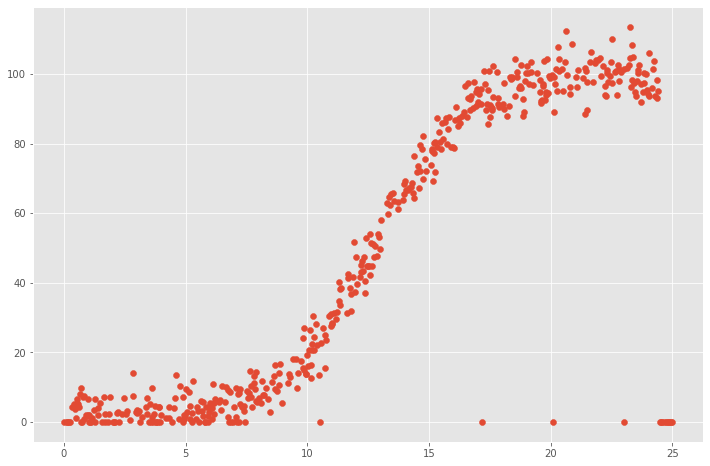

In [5]:
power_data = np.genfromtxt("power_production.csv", delimiter=",", names=["x", "y"])
fig=plt.figure(figsize=(12,8))  # adapted from https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.scatter(power_data['x'], power_data['y'])


The curve produced by plotting wind-speed against power output is s-shaped. This suggests that power output is quite small at low wind speeds, climbs sharply after a certain speed and then much more slowly before it reaches a maximum. The characteristic shape of the graph is explained by [this article](https://now.tufts.edu/articles/how-do-windmills-create-electricity) on how windmills create energy. It seems that if the turbine is moving quite slowly, electricity is not creatyed. Energy starts to be created at what is known as the cut-in speed/ After the cut-in point energy is created at a fast rate but this rate starts to slow until it reaches its maximum rated wins speed. SAbove this point, the power output remains constant. We can see this as the top of the s-shape in the graph. Wind turbines also have a cut-out speed, at which a brake stops the winds rotation. I wonder if some of the zero value power outputs we see can be explained by problems caused by high wind speed.
[https://now.tufts.edu/articles/how-do-windmills-create-electricity]

## S-shaped curves

I'm struck by the shape of the curve produce by the relationship between wind speed and power output, the related sigmoid function and the mechanism of firing neurons as described in the lectures on neural networks. The way that neurons need a build up of signals before firing strikes me as similar to the way the wind turbines have a cut-in speed, after which they start to produce electricity. The sigmoid function is described in the lectures as like an on/off switch. Is there a relationship between the activation function and thr function needed to describe the power output from wind turbines?
[https://en.wikipedia.org/wiki/Sigmoid_function]

In [6]:
train = pd.DataFrame()
msk = np.random.rand(len(df_new)) < 0.8
train = df_new[msk]
test = df_new[~msk]
train_x = train.iloc[:,0]
train_x
train_y = train.iloc[:,1]
train_y
test_x = test.iloc[:,0]
test_x
test_y = test.iloc[:,1]
test_y
# https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas

6        5.186
11       5.241
12       4.220
15       0.000
16       0.000
        ...   
472    102.644
474     96.986
475     94.671
484    101.419
489     95.117
Name: power, Length: 110, dtype: float64

In [7]:
# Train a model.
m = kr.models.Sequential()
m.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
m.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [8]:
# Fit the data.
m.fit(train_x, train_y, epochs=500, batch_size=10)

Epoch 1/500
38/38 [==============================] - 0s 746us/step - loss: 4060.1914
Epoch 2/500
38/38 [==============================] - 0s 689us/step - loss: 3888.2759
Epoch 3/500
38/38 [==============================] - 0s 810us/step - loss: 3714.7236
Epoch 4/500
38/38 [==============================] - 0s 771us/step - loss: 3537.1069
Epoch 5/500
38/38 [==============================] - 0s 759us/step - loss: 3361.7258
Epoch 6/500
38/38 [==============================] - 0s 891us/step - loss: 3201.6865
Epoch 7/500
38/38 [==============================] - ETA: 0s - loss: 2418.22 - 0s 723us/step - loss: 3074.3008
Epoch 8/500
38/38 [==============================] - 0s 636us/step - loss: 2967.8992
Epoch 9/500
38/38 [==============================] - 0s 734us/step - loss: 2864.2124
Epoch 10/500
38/38 [==============================] - 0s 889us/step - loss: 2767.1357
Epoch 11/500
38/38 [==============================] - 0s 625us/step - loss: 2680.8220
Epoch 12/500
38/38 [=================

38/38 [==============================] - 0s 630us/step - loss: 225.4902
Epoch 97/500
38/38 [==============================] - 0s 656us/step - loss: 219.0195
Epoch 98/500
38/38 [==============================] - 0s 604us/step - loss: 212.8132
Epoch 99/500
38/38 [==============================] - 0s 265us/step - loss: 206.2419
Epoch 100/500
38/38 [==============================] - 0s 604us/step - loss: 200.3366
Epoch 101/500
38/38 [==============================] - 0s 630us/step - loss: 195.4035
Epoch 102/500
38/38 [==============================] - 0s 630us/step - loss: 188.5894
Epoch 103/500
38/38 [==============================] - 0s 709us/step - loss: 183.5614
Epoch 104/500
38/38 [==============================] - 0s 630us/step - loss: 178.6737
Epoch 105/500
38/38 [==============================] - 0s 630us/step - loss: 173.9079
Epoch 106/500
38/38 [==============================] - 0s 814us/step - loss: 168.5934
Epoch 107/500
38/38 [==============================] - 0s 656us/step - 

Epoch 192/500
38/38 [==============================] - 0s 670us/step - loss: 41.1127
Epoch 193/500
38/38 [==============================] - 0s 657us/step - loss: 40.8413
Epoch 194/500
38/38 [==============================] - 0s 765us/step - loss: 40.4088
Epoch 195/500
38/38 [==============================] - 0s 772us/step - loss: 39.9353
Epoch 196/500
38/38 [==============================] - 0s 747us/step - loss: 39.4941
Epoch 197/500
38/38 [==============================] - 0s 654us/step - loss: 39.5689
Epoch 198/500
38/38 [==============================] - 0s 664us/step - loss: 39.1747
Epoch 199/500
38/38 [==============================] - 0s 638us/step - loss: 38.4384
Epoch 200/500
38/38 [==============================] - 0s 666us/step - loss: 38.9640
Epoch 201/500
38/38 [==============================] - 0s 647us/step - loss: 37.6812
Epoch 202/500
38/38 [==============================] - 0s 726us/step - loss: 37.4470
Epoch 203/500
38/38 [==============================] - 0s 648us/s

38/38 [==============================] - 0s 652us/step - loss: 23.5969
Epoch 289/500
38/38 [==============================] - 0s 724us/step - loss: 23.1734
Epoch 290/500
38/38 [==============================] - 0s 772us/step - loss: 23.2443
Epoch 291/500
38/38 [==============================] - 0s 377us/step - loss: 22.9668
Epoch 292/500
38/38 [==============================] - 0s 615us/step - loss: 23.0083
Epoch 293/500
38/38 [==============================] - 0s 601us/step - loss: 23.0608
Epoch 294/500
38/38 [==============================] - 0s 650us/step - loss: 22.9437
Epoch 295/500
38/38 [==============================] - 0s 696us/step - loss: 22.7593
Epoch 296/500
38/38 [==============================] - 0s 633us/step - loss: 22.7775
Epoch 297/500
38/38 [==============================] - 0s 734us/step - loss: 22.7809
Epoch 298/500
38/38 [==============================] - 0s 618us/step - loss: 22.6202
Epoch 299/500
38/38 [==============================] - 0s 656us/step - loss: 22

38/38 [==============================] - 0s 663us/step - loss: 19.5245
Epoch 385/500
38/38 [==============================] - 0s 667us/step - loss: 19.4723
Epoch 386/500
38/38 [==============================] - 0s 788us/step - loss: 19.6730
Epoch 387/500
38/38 [==============================] - 0s 598us/step - loss: 19.5235
Epoch 388/500
38/38 [==============================] - 0s 711us/step - loss: 19.3634
Epoch 389/500
38/38 [==============================] - 0s 610us/step - loss: 19.7832
Epoch 390/500
38/38 [==============================] - 0s 700us/step - loss: 19.4195
Epoch 391/500
38/38 [==============================] - 0s 696us/step - loss: 19.4986
Epoch 392/500
38/38 [==============================] - 0s 751us/step - loss: 19.3725
Epoch 393/500
38/38 [==============================] - 0s 625us/step - loss: 19.3464
Epoch 394/500
38/38 [==============================] - 0s 643us/step - loss: 19.3547
Epoch 395/500
38/38 [==============================] - 0s 722us/step - loss: 19

38/38 [==============================] - 0s 671us/step - loss: 18.1562
Epoch 481/500
38/38 [==============================] - 0s 687us/step - loss: 18.1973
Epoch 482/500
38/38 [==============================] - 0s 644us/step - loss: 18.0860
Epoch 483/500
38/38 [==============================] - 0s 656us/step - loss: 18.0814
Epoch 484/500
38/38 [==============================] - 0s 656us/step - loss: 18.2884
Epoch 485/500
38/38 [==============================] - 0s 661us/step - loss: 18.0697
Epoch 486/500
38/38 [==============================] - 0s 670us/step - loss: 18.1396
Epoch 487/500
38/38 [==============================] - 0s 632us/step - loss: 18.1988
Epoch 488/500
38/38 [==============================] - 0s 729us/step - loss: 18.0770
Epoch 489/500
38/38 [==============================] - 0s 681us/step - loss: 18.0058
Epoch 490/500
38/38 [==============================] - 0s 641us/step - loss: 18.0383
Epoch 491/500
38/38 [==============================] - 0s 693us/step - loss: 18

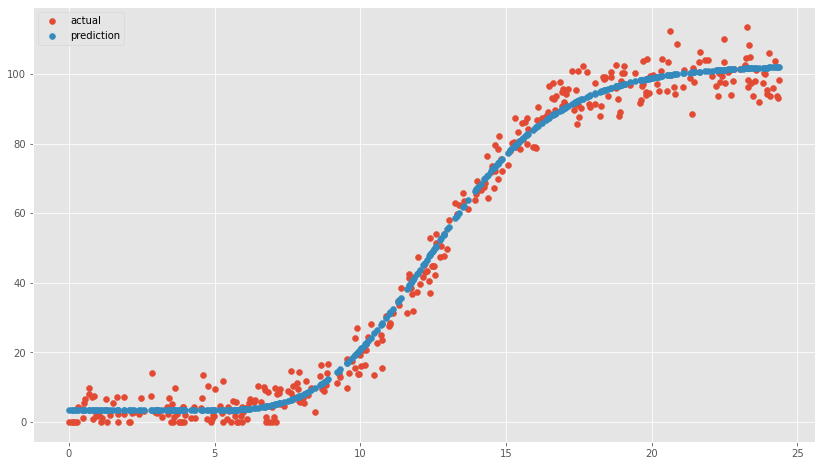

In [9]:
# Now let's see.
plt.scatter(train_x, train_y, label='actual')
plt.scatter(train_x, m.predict(train_x), label='prediction')
plt.legend();

In [10]:
# Take four hand-picked values and see their predictions.
m.predict([1.0,5.0,10.0,15.0, 20.0])

array([[ 3.4895391],
       [ 3.3846667],
       [20.808798 ],
       [76.800285 ],
       [98.831764 ]], dtype=float32)

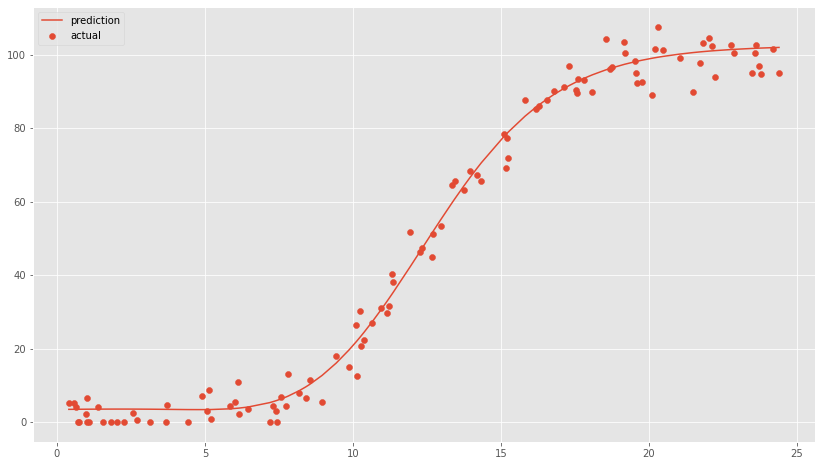

In [11]:
# Let's plot our predictions of the x values we kept for testing
plt.scatter(test_x, test_y, label='actual')
plt.plot(test_x, m.predict(test_x), label='prediction')
plt.legend();

In [12]:
# Evaluate the neural network on the test data.
m.evaluate(test_x, test_y)

4/4 [==============================] - 0s 0s/step - loss: 17.0453


17.045284271240234

### End

In [13]:
# create a new neural network
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# dense: everything in current layer connected to every thing in previous layer
# 1: number of neurons in the layer
# input_dim=1  number of dimensions in input is 1 (1 input)
# linear activation function
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model.
# bog standard to optimize - optimizer="sgd"
# loss="mean_squared_error" ... cost function
m.compile(loss="mean_squared_error", optimizer="sgd")

In [14]:
# Create some input values.
x = np.arange(-10.0, 10.1, 1.0)

# Run each x value through the neural network.
y = m.predict(x)

In [15]:
# Have a look at x.
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [16]:
y

array([[-10.],
       [ -9.],
       [ -8.],
       [ -7.],
       [ -6.],
       [ -5.],
       [ -4.],
       [ -3.],
       [ -2.],
       [ -1.],
       [  0.],
       [  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.]], dtype=float32)

In [17]:
m.layers[0].weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [18]:
m
